In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

In [34]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.shape

(891, 12)

In [36]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [37]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


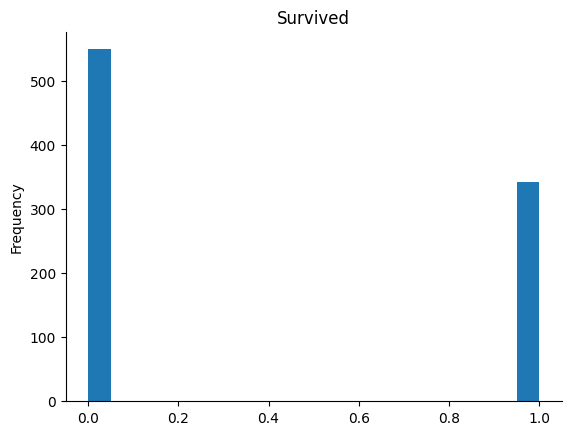

In [39]:
from matplotlib import pyplot as plt
df['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [41]:
df.dropna(inplace = True)
print(df.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch             Ticket      Fare            Cabin Embarked
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0           PC 17599   71.2833              C85        C
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0             113803   53.1000             C123        S
6              7         0       1                                                             McCarthy, Mr. Timothy J    male  54.00      0      0              17463   51.8625              E46        S
10            11         1       3                                                     Sandstrom, Miss. Marguerite Rut  female   4.00      1      1            PP 9549   16.7000            

In [14]:
df.drop_duplicates(inplace = True)

In [42]:
df['Date'] = pd.to_datetime(df['Embarked'], format='mixed', errors='coerce')
print(df.to_string())


     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch             Ticket      Fare            Cabin Embarked Date
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0           PC 17599   71.2833              C85        C  NaT
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0             113803   53.1000             C123        S  NaT
6              7         0       1                                                             McCarthy, Mr. Timothy J    male  54.00      0      0              17463   51.8625              E46        S  NaT
10            11         1       3                                                     Sandstrom, Miss. Marguerite Rut  female   4.00      1      1            PP 9549  

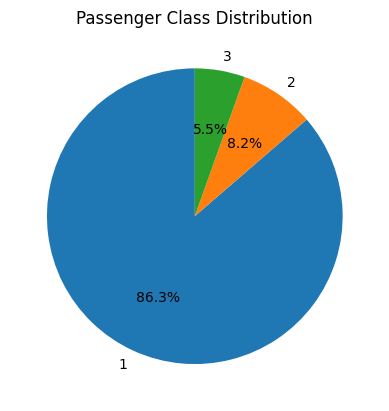

In [43]:
pclass_counts = df['Pclass'].value_counts()

# Create the pi chart
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Passenger Class Distribution')
plt.show()

In [44]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(numerical_cols)
print(categorical_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [45]:
print("\nSummary:")
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns.")
print("There are missing values in several columns, particularly 'Age' and 'Cabin'.")
print("Categorical features like 'Sex', 'Embarked', and 'Pclass' show distinct value distributions.")



Summary:
The dataset has 183 rows and 13 columns.
There are missing values in several columns, particularly 'Age' and 'Cabin'.
Categorical features like 'Sex', 'Embarked', and 'Pclass' show distinct value distributions.


Data Cleaning


In [46]:
from sklearn.preprocessing import MinMaxScaler
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df[numerical_features].describe())

              Age       SibSp       Parch        Fare
count  183.000000  183.000000  183.000000  183.000000
mean     0.439484    0.154827    0.118852    0.153578
std      0.197823    0.214720    0.188654    0.149021
min      0.000000    0.000000    0.000000    0.000000
25%      0.291856    0.000000    0.000000    0.057971
50%      0.443601    0.000000    0.000000    0.111257
75%      0.589024    0.333333    0.250000    0.175668
max      1.000000    1.000000    1.000000    1.000000


Data Visualization


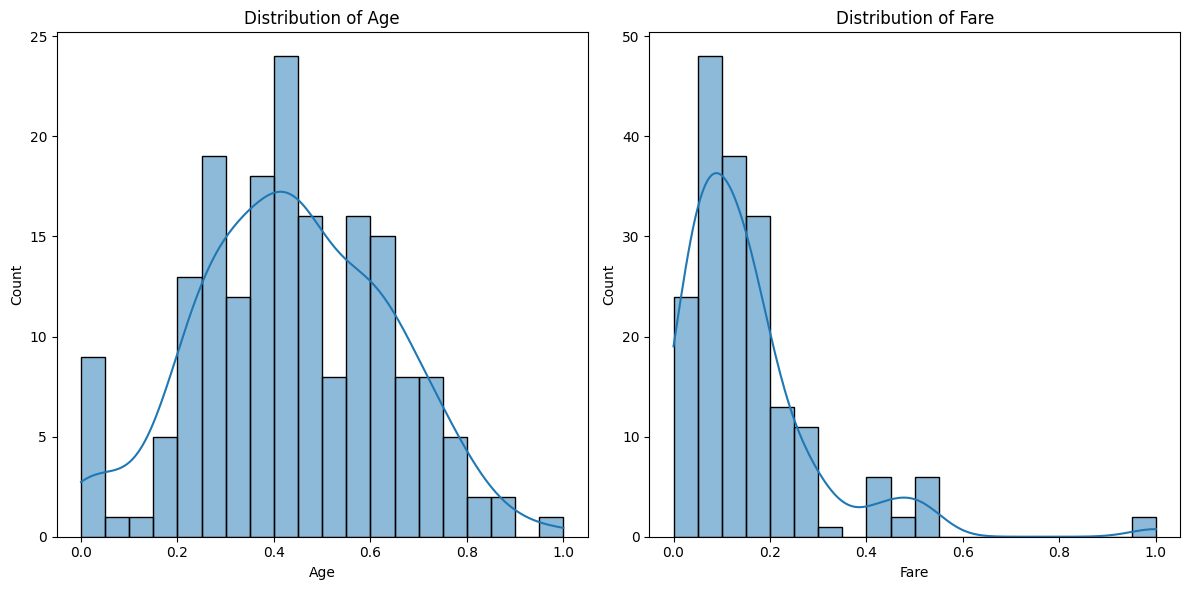

In [55]:
# 1. Histograms for numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Fare']):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



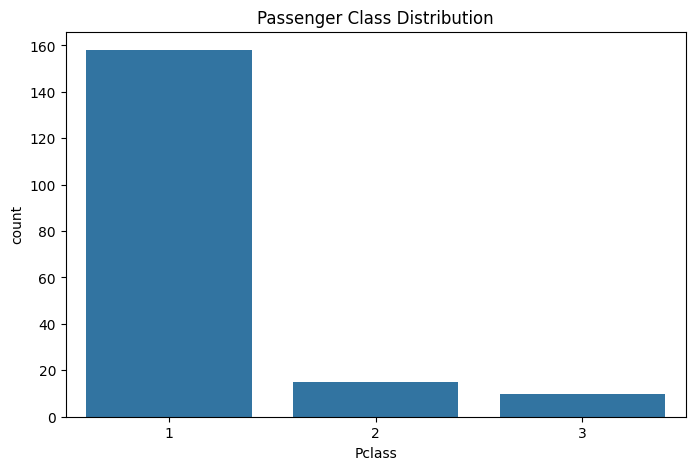

In [56]:
# 2. Bar chart for categorical features
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

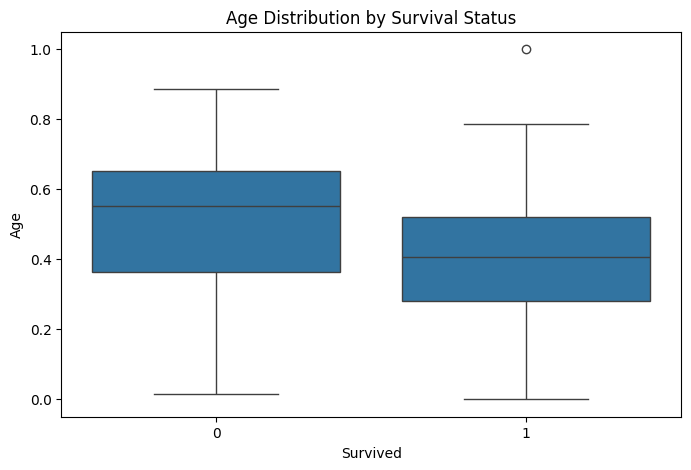

In [59]:
# 3. Box plots for numerical features by category
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()

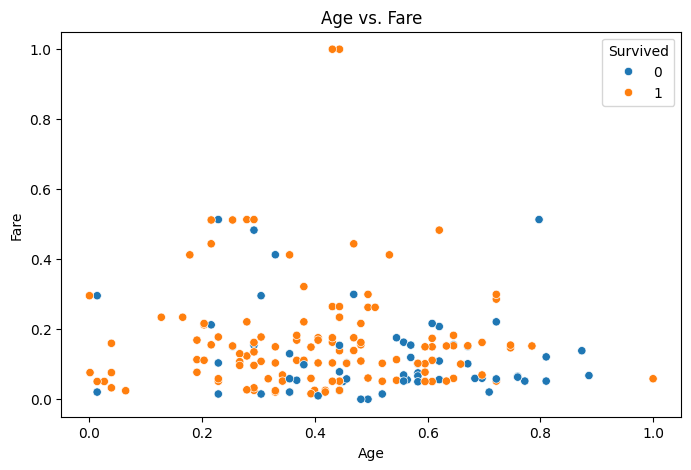

In [60]:
# 4. Scatter plot for relationship between numerical features
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')
plt.title('Age vs. Fare')
plt.show()

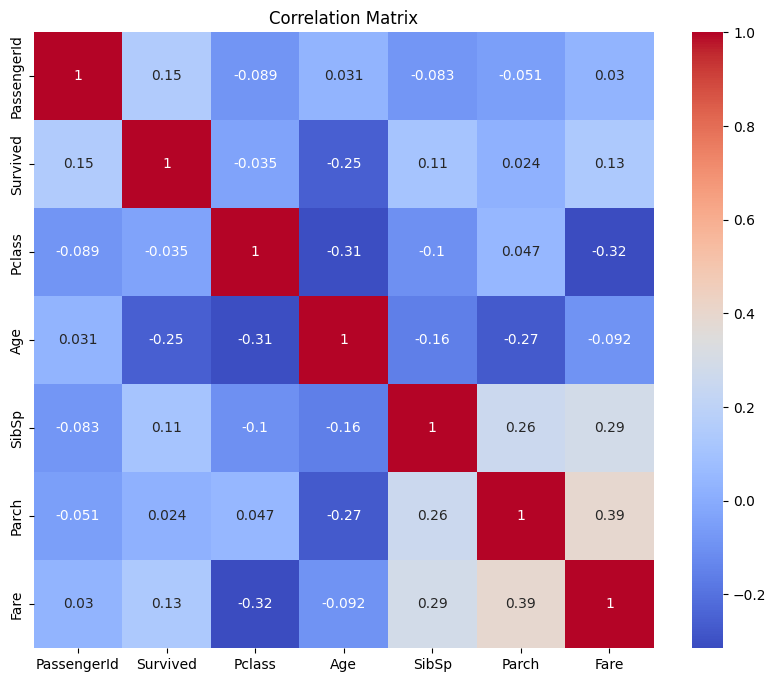

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

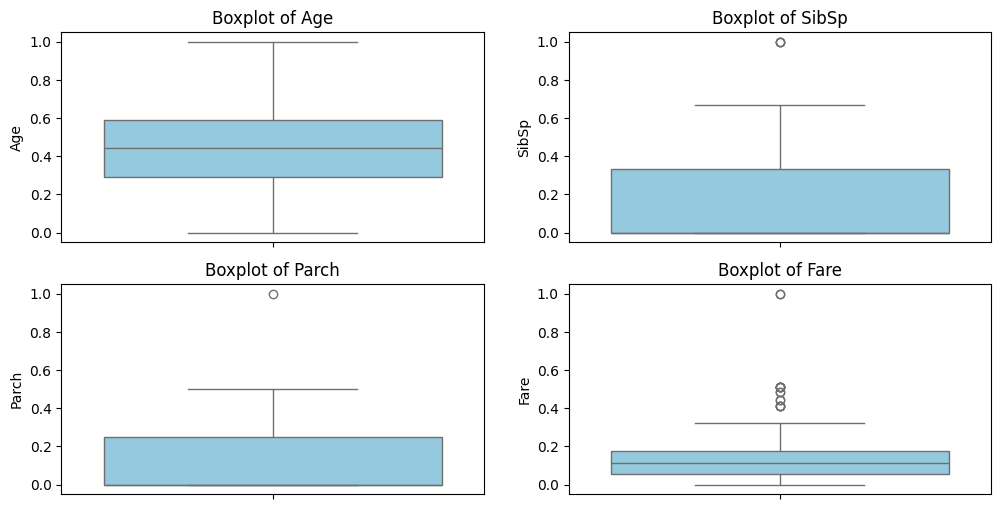

In [49]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

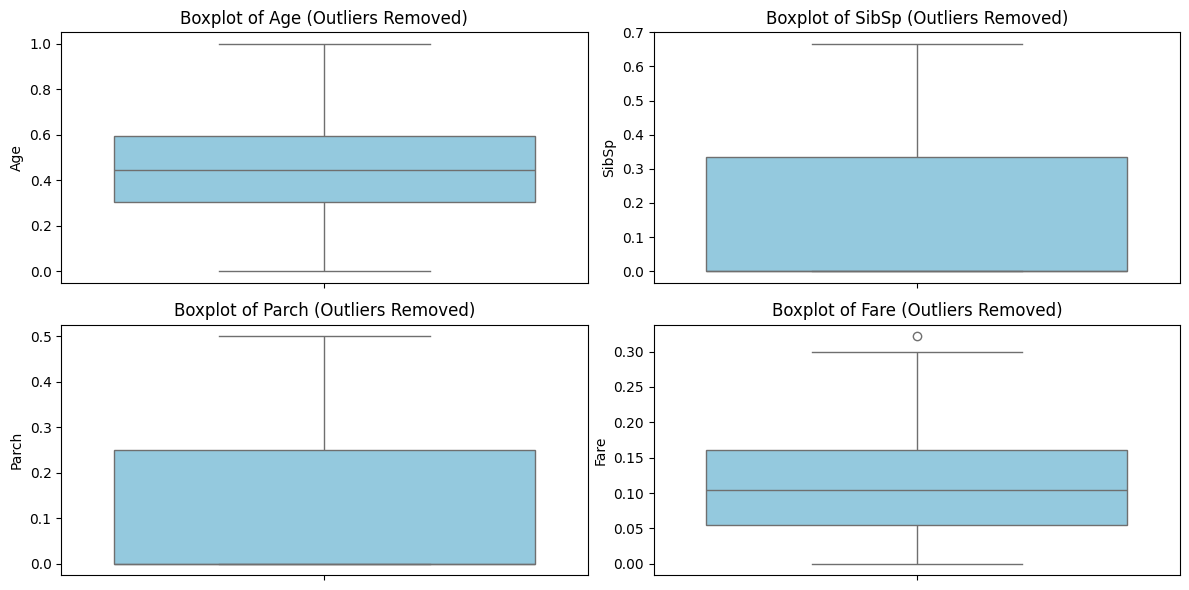

In [50]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

df_no_outliers = df.copy()
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]


plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_no_outliers[feature], color='skyblue')
    plt.title(f'Boxplot of {feature} (Outliers Removed)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

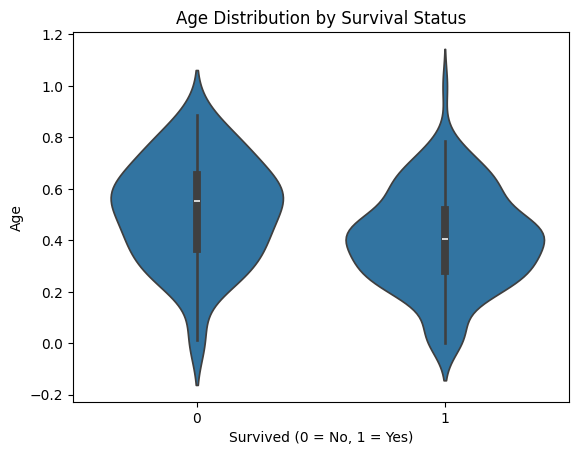

In [54]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

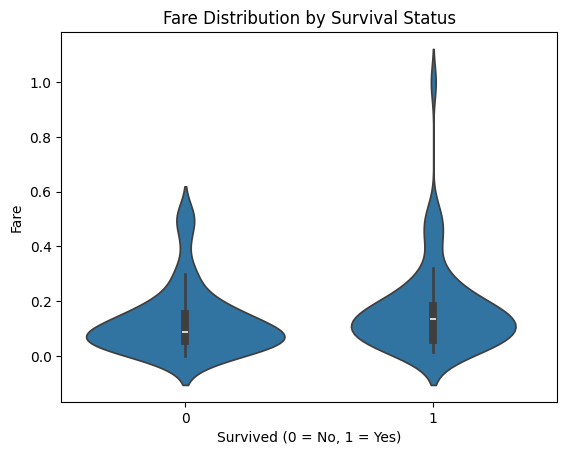

In [53]:
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()